# Exclusion plot of models
In this tutorial we will obtain the exclusion plot in the parameter space of $(m_a,f_a)$ for four different benchmark models: QED-DFSZ, Q-KSVZ, top-philic and flaxion. For a detailed explanation of each of them, please refer to Section 6.1 of our work <a href="#AlpacaPheno">[0]</a>.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import alpaca
from alpaca import ALPcouplings
from alpaca.uvmodels import QED_DFSZ, beta, Q_KSVZ, KSVZ_charge, flaxion_benchmark
from alpaca.statistics import get_chi2
from alpaca.sectors import default_sectors
from alpaca.plotting.mpl import exclusionplot
import sys

plt.rcParams.update({'font.size': 12, 'text.usetex': True, 'font.family': 'serif', 'font.serif': 'Computer Modern Roman'})

In [2]:
fa = np.logspace(1, 12, 100)
ma = np.logspace(-2, 1, 100)
x_ma, y_fa = np.meshgrid(ma, fa) #Create meshgrid of mass and scale

### Flaxion

In [3]:
# Generate couplings, running and matching to desired scale
couplings_flaxion = [flaxion_benchmark.get_couplings(0.2, Lambda).match_run(10.01, 'VA_below', match_2loops=True) for Lambda in 4*np.pi*fa]
x_ma, y_couplings_flaxion = np.meshgrid(ma, couplings_flaxion)

In [4]:
# Calculation of the chi2 distribution considering all transitions present in alpaca
chi2_flaxion = get_chi2(default_sectors['all'], x_ma, y_couplings_flaxion, y_fa, integrator='no_rge', min_probability=0)
chi2_flaxion_meas=chi2_flaxion[0].split_measurements()

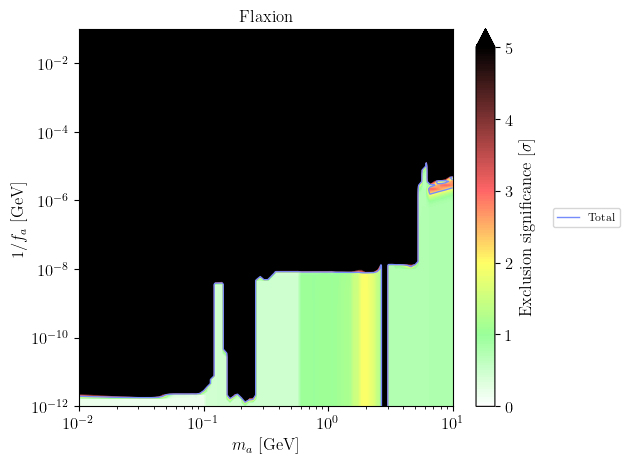

In [5]:
fig, ax = plt.subplots()

exclusionplot(x_ma, 1/y_fa,chi2_flaxion, r'$m_a$ [GeV]', r'$ 1/f_a$ [GeV]', rf'Flaxion', ax=ax)

ax.set_xscale('log')
ax.set_yscale('log')
# fig.savefig('flaxion_exclusion.pdf', bbox_inches='tight')

### QED DFSZ

In [20]:
couplings_QED_DFSZ = [QED_DFSZ.get_couplings({beta: np.pi/4}, Lambda).match_run(10.01, 'VA_below', match_2loops=True) for Lambda in 4*np.pi*fa]
x_ma, y_couplings_DFSZ = np.meshgrid(ma, couplings_QED_DFSZ)

In [21]:
chi2_QED_DFSZ = get_chi2(default_sectors['all'], x_ma, y_couplings_DFSZ, y_fa, integrator='no_rge', min_probability=0)
chi2_QED_DFSZ_meas = chi2_QED_DFSZ[0].split_measurements()

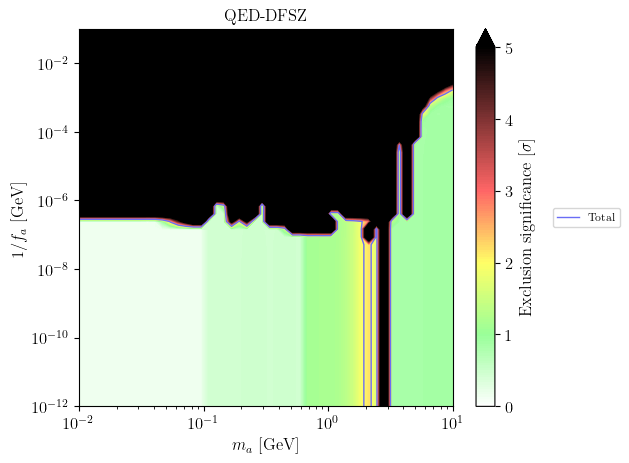

In [ ]:
fig, ax = plt.subplots()

exclusionplot(x_ma, 1/y_fa,chi2_QED_DFSZ, r'$m_a$ [GeV]', r'$ 1/f_a$ [GeV]', rf'QED-DFSZ', ax=ax)

ax.set_xscale('log')
ax.set_yscale('log')
# fig.savefig('QED_DFSZ_exclusion.pdf', bbox_inches='tight')

### Q-KSVZ

In [6]:
couplings_Q_KSVZ = [Q_KSVZ.get_couplings({KSVZ_charge: 1}, Lambda).match_run(10.01, 'VA_below', match_2loops=True) for Lambda in 4*np.pi*fa]
x_ma, y_couplings_Q_KSVZ = np.meshgrid(ma, couplings_Q_KSVZ)

In [7]:
chi2_Q_KSVZ = get_chi2(default_sectors['all'], x_ma, y_couplings_Q_KSVZ, y_fa, integrator='no_rge', min_probability=0, match_2loops=True)
chi2_Q_KSVZ_meas = chi2_Q_KSVZ[0].split_measurements()

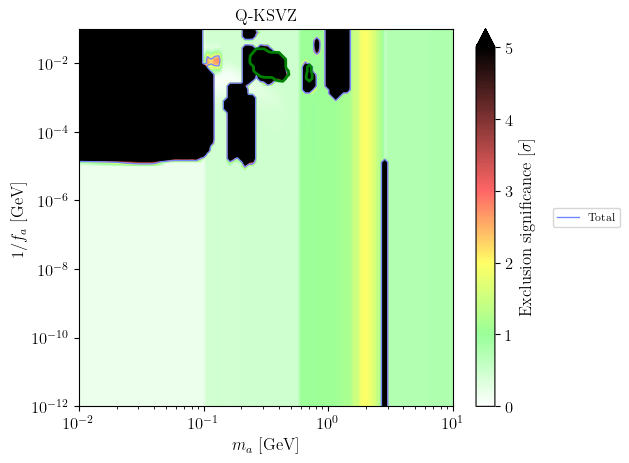

In [8]:
fig, ax = plt.subplots()

exclusionplot(x_ma, 1/y_fa,chi2_Q_KSVZ, r'$m_a$ [GeV]', r'$ 1/f_a$ [GeV]', rf'Q-KSVZ', ax=ax)

ax.contour(x_ma, 1/y_fa,chi2_Q_KSVZ_meas[88].significance(), levels=[2], linewidths=2, colors='red')
ax.contour(x_ma, 1/y_fa,chi2_Q_KSVZ_meas[83].significance(), levels=[2], linewidths=2, colors='orange')

ax.contour(x_ma, 1/y_fa,chi2_Q_KSVZ_meas[95].significance(), levels=[2], linewidths=2, colors='purple')
ax.contour(x_ma, 1/y_fa,chi2_Q_KSVZ_meas[32].significance(), levels=[2], linewidths=2, colors='green')

ax.contour(x_ma, 1/y_fa,chi2_Q_KSVZ_meas[12].significance(), levels=[2], linewidths=2, colors='yellow')

ax.contour(x_ma, 1/y_fa,chi2_Q_KSVZ_meas[65].significance(), levels=[2], linewidths=2, colors='cyan')
ax.contour(x_ma, 1/y_fa,chi2_Q_KSVZ_meas[68].significance(), levels=[2], linewidths=2, colors='pink')

ax.set_xscale('log')
ax.set_yscale('log')
# fig.savefig('Q_KSVZ_exclusion.pdf', bbox_inches='tight')

### Top-philic

In [26]:
couplings_top_philic = [ALPcouplings({'cuR': np.diag([0, 0, 1])}, scale= Lambda, basis='derivative_above').match_run(10.01, 'VA_below', match_2loops=True) for Lambda in 4*np.pi*fa]
x_ma, y_couplings_top_philic = np.meshgrid(ma, couplings_top_philic)

In [27]:
chi2_top_philic = get_chi2(default_sectors['all'], x_ma, y_couplings_top_philic, y_fa, integrator='no_rge', min_probability=0)
chi2_top_philic_meas = chi2_top_philic[0].split_measurements()

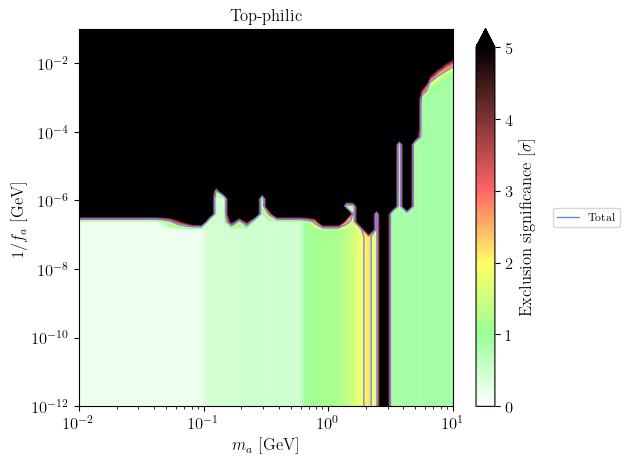

In [ ]:
fig, ax = plt.subplots()

exclusionplot(x_ma, 1/y_fa,chi2_top_philic, r'$m_a$ [GeV]', r'$ 1/f_a$ [GeV]', rf'Top-philic', ax=ax)

ax.set_xscale('log')
ax.set_yscale('log')
# fig.savefig('top_philic_exclusion.pdf', bbox_inches='tight')

### Combined

Text(0, 0.5, '$1/f_a$ [GeV]')

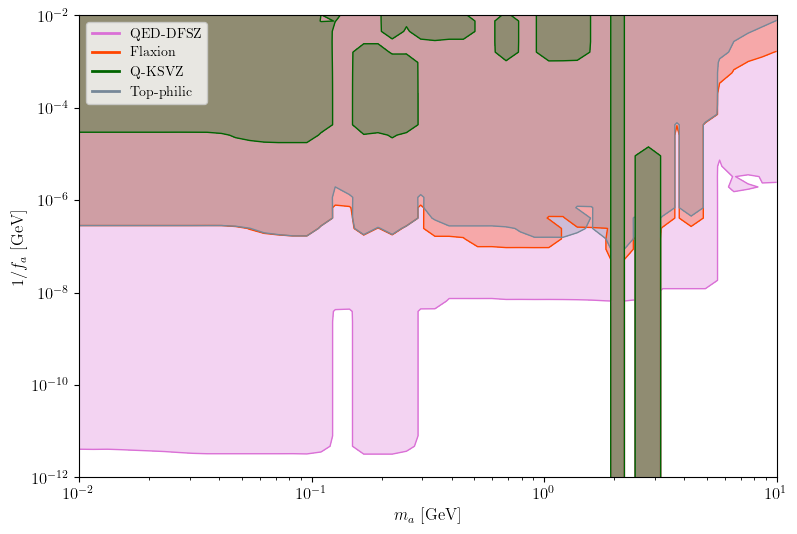

In [29]:
fig, ax = plt.subplots(figsize=(9,6))

z_dfsz=chi2_QED_DFSZ[0].significance()
z_flaxion=chi2_flaxion[0].significance()
z_Q_KSVZ=chi2_Q_KSVZ[0].significance()
z_top_philic=chi2_top_philic[0].significance()

ax.contourf(x_ma, 1/y_fa, z_flaxion, levels=[2, 10000], colors='orchid', alpha=0.3)
ax.contour(x_ma, 1/y_fa, z_flaxion, levels=[2], colors='orchid', linewidths=1, linestyles='solid')

ax.contourf(x_ma, 1/y_fa, z_dfsz, levels=[2, 10000], colors='orangered', alpha=0.3)
ax.contour(x_ma, 1/y_fa, z_dfsz, levels=[2], colors='orangered', linewidths=1, linestyles='solid')

ax.contourf(x_ma, 1/y_fa, z_top_philic, levels=[2, 10000], colors='lightslategrey', alpha=0.3)
ax.contour(x_ma, 1/y_fa, z_top_philic, levels=[2], colors='lightslategrey', linewidths=1, linestyles='solid')

ax.contourf(x_ma, 1/y_fa, z_Q_KSVZ, levels=[2, 10000], colors='darkgreen', alpha=0.3)
ax.contour(x_ma, 1/y_fa, z_Q_KSVZ, levels=[2], colors='darkgreen', linewidths=1, linestyles='solid')

handles= [
    plt.Line2D([0], [0], color='orchid', lw=2, label=r'QED-DFSZ'),
    plt.Line2D([0], [0], color='orangered', lw=2, label=r'Flaxion'),
    plt.Line2D([0], [0], color='darkgreen', lw=2, label=r'Q-KSVZ'),
    plt.Line2D([0], [0], color='lightslategrey', lw=2, label=r'Top-philic')
]
ax.legend(handles=handles, loc='upper left', fontsize=10)
ax.set_xlim(1e-2, 1e1)
ax.set_ylim(1e-12, 1e-2)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$m_a$ [GeV]')
ax.set_ylabel(r'$1/f_a$ [GeV]')
# fig.savefig('models_exclusion_combined.pdf', bbox_inches='tight')

## References

<a id="AlpacaPheno">[0]</a>    
J. Alda, M. Fuentes Zamoro, L. Merlo, X. Ponce Diaz, S. Rigolin    
*Comprehensive ALP searches in Meson Decays*,    
In preparation.